The Dataset has the following features
 1. date : dates

 2.precipitation : All forms in which water falls on the land surface and open water bodies as rain, sleet, snow, hail, or drizzle

 3.temp_max : Maximum Temperature

 4.temp_min : Minimum Temperature

 5.wind : Wind speed

 6.weather : type of weather





In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime  # for date parsing

##Basic Data Exploration

As the date column is not in the date datatype, we are changing the format of date feature by using date_parser. So,Python has a built-in method to parse dates.

In [2]:
#reading the csv file
df=pd.read_csv("/content/seattle-weather.csv",date_parser=['date'],infer_datetime_format=True)
df['date']=pd.to_datetime(df['date'],format="%Y-%m-%d")

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
#changes are reflected
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [5]:
df.shape

(1461, 6)

In [6]:
#checking for missing values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


### Visualization 

In [8]:
import plotly.express as px

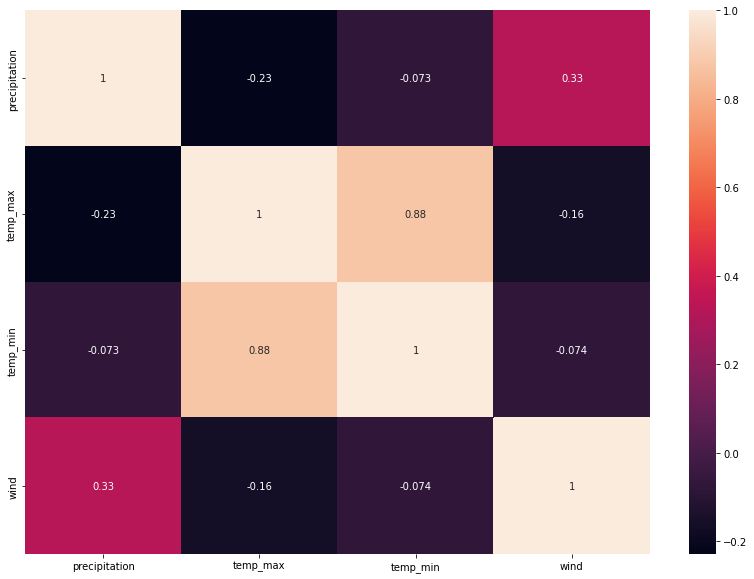

In [9]:
plt.figure(figsize = (14,10))

sns.heatmap(df.corr(),annot=True)
plt.show()

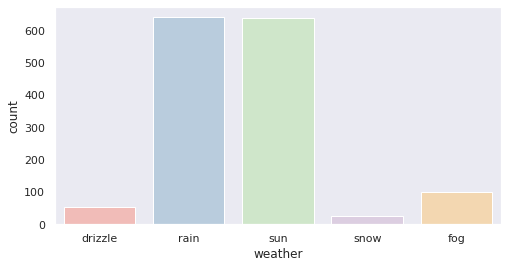

In [10]:
plt.figure(figsize=(8,4))
sns.set_style("dark")
sns.set_context("notebook")
sns.countplot(x="weather",data=df,palette="Pastel1")

The occurance of sun and rain weather pattern tops the most than other season in seattle

In [11]:

fig = px.line(df, x="date", y="temp_max",color="weather")
fig.show()

In [12]:
fig1=px.line(df,x="date",y="precipitation",color="weather")
fig1.show()

<Figure size 1008x576 with 0 Axes>

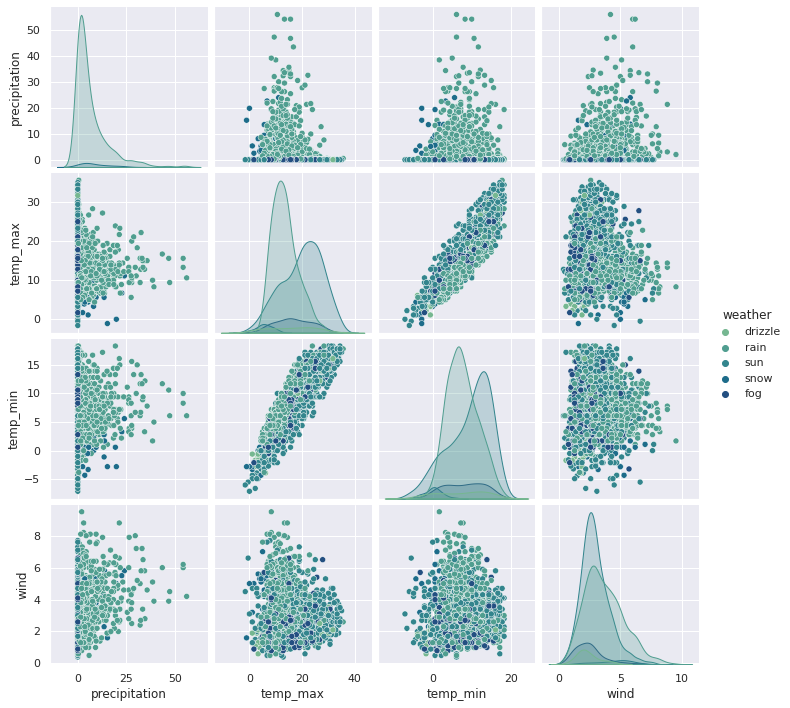

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.pairplot(df.drop('date',axis=1),hue='weather',palette="crest")
plt.show()

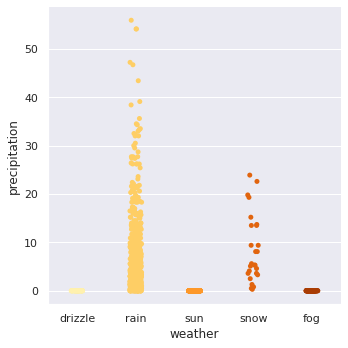

In [14]:
sns.catplot(x='weather',y ='precipitation',data=df,palette = "YlOrBr")
plt.show()

##Building the  model

In [15]:
#implementing decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:
#Feature selection
X=df.drop(['date','weather'],axis=1) 
y=df['weather']   #Target variable

In [17]:
#performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

###1.Decision Tree Classifier with criterion gini index
   It is calculated by subtracting the sum of squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values.

In [18]:
#using gini index as attribute selection measure
clf_gini = DecisionTreeClassifier(criterion="gini",max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
y_pred_gini = clf_gini.predict(X_test)
#printing the predictions
y_pred_gini

array(['sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun',
       'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'rain',
       'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun',
       'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'sun',
       'sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain',
       'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'rain', 'sun', 'rain

In [20]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8406


In [21]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'snow', 'sun', 'sun', 'rain', 'rain', 'rain', 'rain',
       'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain', 'rain',
       'rain', 'sun', 'rain', 'rain', 'snow', 'rain', 'sun', 'rain',
       'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain',
       'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun',
       'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 

In [22]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8620


Here, the training-set accuracy score is **0.8620** while the test-set accuracy to be  **0.8402**. 

### 2. Decision Tree Classifier with criterion Entropy

 
   Entropy measures the impurity in the given dataset.Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.By calculating decrease in entropy measure of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node

In [23]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [24]:
y_pred_en = clf_en.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8344


In [26]:
y_pred_train_en = clf_en.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8620


Here, the training-set accuracy score is 0.8620 while the test-set accuracy to be 0.8344.

### Metrics

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))
#The F1 score favors classifiers that have similar precision and recall.The F1 score conveys the balance between the precision and the recall

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        16
         fog       0.00      0.00      0.00        40
        rain       0.96      0.93      0.94       218
        snow       0.50      0.11      0.18         9
         sun       0.74      1.00      0.85       200

    accuracy                           0.83       483
   macro avg       0.44      0.41      0.40       483
weighted avg       0.75      0.83      0.78       483



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



from the above classificatioin report,the season sun and rain has highest F1 score than any other lables.the higher the F1 score the better, with 0 being the worst possible and 1 being the best.the reason for other labels having such low F1 score is the labels are not equally distributed

#Plotting the decision tree

### 1.Gini index

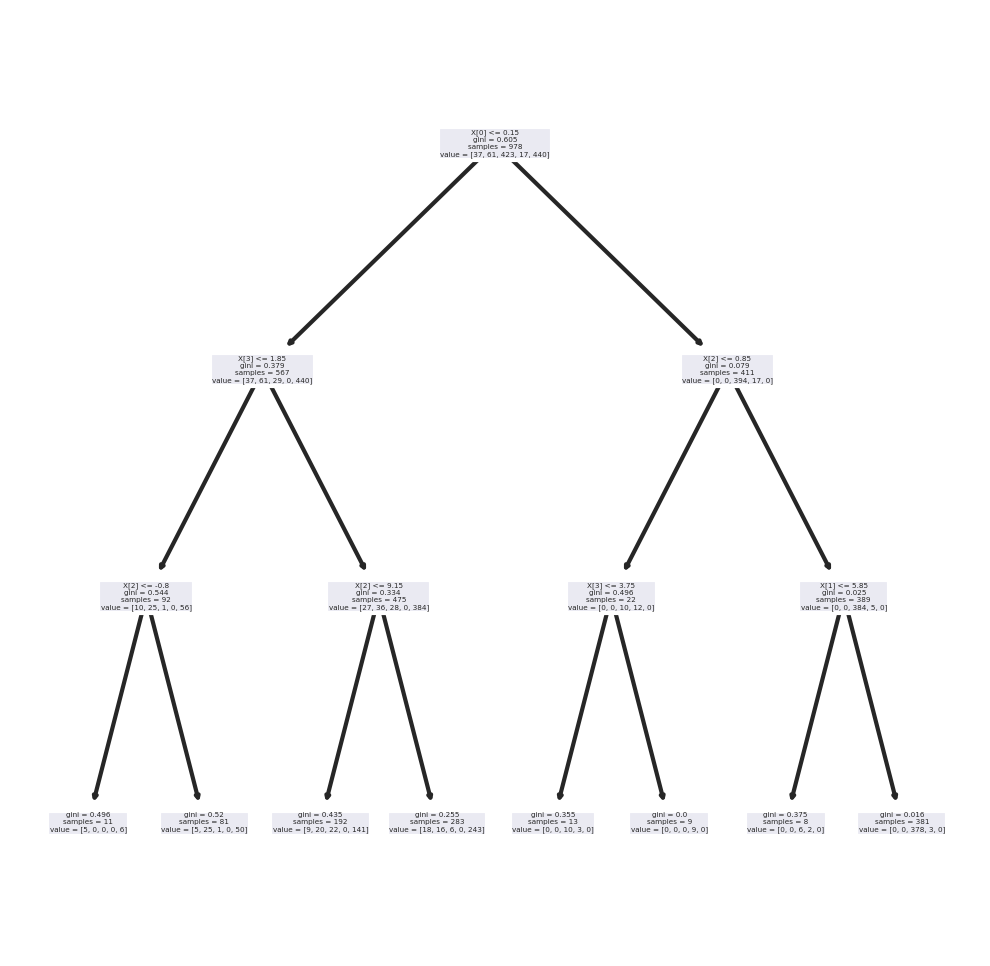

In [28]:

from sklearn import tree
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_gini);

### 2.Entropy

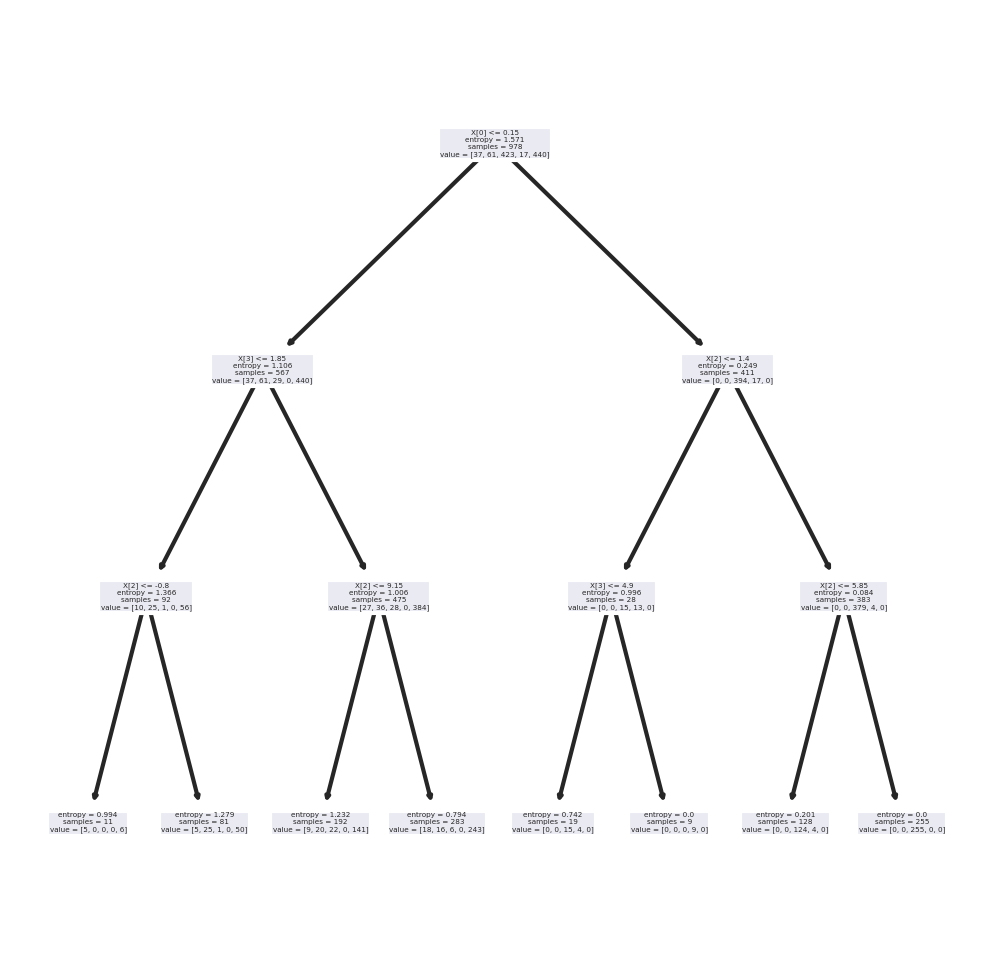

In [29]:
#plotting decision tree with entropy selection criteria
from sklearn import tree
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_en);